# Predictive Models

>This material is an adaptation of the article [Regression and Classification](https://machinelearningmodels.org/regression-and-classification) developed by Andrew Nailman at the [Machine Learning Models](https://machinelearningmodels.org/) website.

In Machine Learnnig (ML), predictive modeling is the use of algorithms to predict the outcome of future events based on historical data. It involves building a mathematical model that takes relevant input variables and generates a predicted output variable. Machine learning algorithms are used to train and improve these models to help you make better decisions.

Regression and classification are fundamental techniques in machine learning, each serving distinct purposes. Regression models predict continuous values, while classification models categorize data into predefined classes. Mastering these techniques involves understanding the data, choosing the right model, and optimizing it for accuracy and efficiency

## Scikit-learn

One of the most popular and accessible libraries for implementing machine learning algorithms in Python is scikit-learn.

Scikit-learn is a versatile and powerful library designed to streamline the process of implementing machine learning algorithms. It offers a wide range of tools for various tasks, including classification, regression, clustering, and dimensionality reduction. One of the main advantages of scikit-learn is its user-friendly API, which makes it accessible even to those with limited programming experience.

## Data Preprocessing in Scikit-Learn

Effective data preprocessing is crucial for building accurate and reliable machine learning models. Scikit-learn offers a variety of tools for transforming raw data into a format suitable for analysis. These tools include functions for handling missing values, scaling numerical features, and encoding categorical variables.

For example, let's load a dataset with both numeric and categorical variables:

In [80]:
!wget https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/INEE/Clase15_BaseRegresionLogistica.sav
!pip install pyreadstat

--2024-07-18 23:37:35--  https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/INEE/Clase15_BaseRegresionLogistica.sav
Resolving github.com (github.com)... 20.201.28.151
Connecting to github.com (github.com)|20.201.28.151|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/renatoparedes/EstadisticaYPsicologiaMatematica/main/INEE/Clase15_BaseRegresionLogistica.sav [following]
--2024-07-18 23:37:36--  https://raw.githubusercontent.com/renatoparedes/EstadisticaYPsicologiaMatematica/main/INEE/Clase15_BaseRegresionLogistica.sav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2694 (2.6K) [application/octet-stream]
Saving to: ‘Clase15_BaseRegresionLogistica.sav’

Clase15_BaseRegresi 1

In [86]:
import pandas as pd

df = pd.read_spss("Clase15_BaseRegresionLogistica.sav")
data = df.drop(columns=["Código", "Sexo", "Edad"])
data

,ProbSueño,Estrés,Ansiedad,Depresión
0,Sí,5.0,7.0,3.0
1,Sí,8.0,6.0,1.0
2,No,2.0,3.0,1.0
3,No,2.0,1.0,2.0
4,No,8.0,2.0,5.0
...,...,...,...,...
95,Sí,6.0,6.0,3.0
96,No,6.0,4.0,0.0
97,Sí,7.0,12.0,11.0
98,Sí,7.0,14.0,9.0


This code shows how to preprocess numeric and categorical features using scikit-learn's Pipeline and ColumnTransformer, standardizing numerical columns and one-hot encoding categorical columns:

In [87]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define preprocessing steps
numeric_features = ["Estrés", "Ansiedad", "Depresión"]
numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])

categorical_features = ["ProbSueño"]
categorical_transformer = Pipeline(steps=[("onehot", OneHotEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Apply preprocessing
preprocessed_data = preprocessor.fit_transform(data)
preprocessed_data
print(preprocessed_data)

[[-0.21762085  0.21267069 -0.19200932  0.          1.        ]
 [ 1.03788405 -0.05998404 -0.84288838  0.          1.        ]
 [-1.47312575 -0.87794821 -0.84288838  1.          0.        ]
 [-1.47312575 -1.42325766 -0.51744885  1.          0.        ]
 [ 1.03788405 -1.15060294  0.45886973  1.          0.        ]
 [ 1.87488732 -0.60529349  1.10974879  0.          1.        ]
 [ 1.03788405 -0.60529349 -1.16832791  1.          0.        ]
 [-1.47312575  0.75798013 -0.51744885  1.          0.        ]
 [ 1.03788405  0.75798013 -0.19200932  0.          1.        ]
 [ 1.03788405  1.30328958  0.78430926  0.          1.        ]
 [ 1.45638569  0.48532541  0.13343021  1.          0.        ]
 [ 0.61938242  1.57594431  1.76062785  0.          1.        ]
 [-0.63612248 -0.33263876 -1.16832791  0.          1.        ]
 [-0.21762085 -0.33263876 -0.84288838  1.          0.        ]
 [-0.21762085 -0.87794821  0.13343021  1.          0.        ]
 [ 0.61938242  2.39390848 -0.84288838  0.          1.  

## Building Machine Learning Models in Scikit-learn

### Classification Models to Predict Categorical Values

Classification models predict categorical values, assigning inputs to one of several predefined classes. These models are crucial in applications like spam detection, image recognition, and medical diagnosis. Popular classification algorithms include logistic regression, decision trees, random forests, and support vector machines (SVM).

Logistic regression estimates the probability of a binary outcome, while decision trees and random forests handle multi-class classification by learning decision rules from the data. Support vector machines are effective for both binary and multi-class classification, using hyperplanes to separate different classes.

Let's build a classifier with our previous example:

In [102]:
from sklearn.model_selection import train_test_split

# Load the data
X = preprocessed_data[:, 0:3]  # Features: Estrés, Ansiedad, Depresión
y = preprocessed_data[:, -1]  # Labels: ProbSueño

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)
print(y_pred)
print(y_test)

[1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0.]


Classification evaluation metrics assess the performance of models that predict categorical values. Key metrics include Accuracy, Precision, Recall, F1 Score, and the Confusion Matrix. These metrics provide a comprehensive view of the model's ability to classify correctly.

Accuracy measures the proportion of correct predictions, while Precision assesses the proportion of true positives among predicted positives. Recall calculates the proportion of true positives among actual positives. The F1 Score balances Precision and Recall, providing a single metric for performance evaluation. The Confusion Matrix visualizes the true positives, true negatives, false positives, and false negatives, offering detailed insights into the model's classification performance.

In [144]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
)

## Evaluate the model
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(
    f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}"
)

Accuracy: 0.6, Precision: 0.4, Recall: 0.2857142857142857, F1 Score: 0.3333333333333333


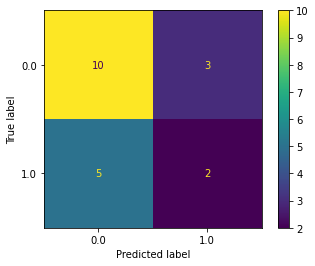

In [145]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

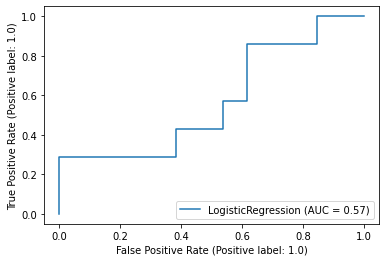

In [146]:
from sklearn.metrics import RocCurveDisplay

roc_display = RocCurveDisplay.from_estimator(model, X_test, y_test)

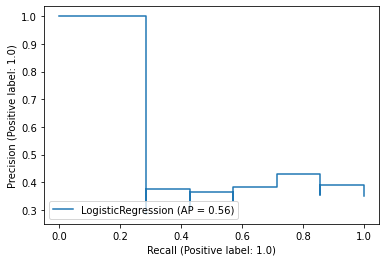

In [147]:
from sklearn.metrics import PrecisionRecallDisplay

pr_display = PrecisionRecallDisplay.from_estimator(model, X_test, y_test)

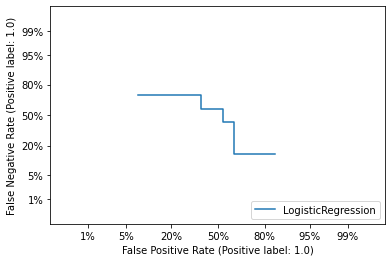

In [148]:
from sklearn.metrics import DetCurveDisplay

DetCurveDisplay.from_estimator(model, X_test, y_test)

### Regression Models to Predict Continuous Values

Regression models are used to predict continuous values, making them ideal for problems where the outcome is a real number. These models establish a relationship between independent variables (features) and a dependent variable (target). Common regression techniques include linear regression, polynomial regression, and support vector regression.

Linear regression is the simplest form, modeling the relationship between variables by fitting a linear equation to observed data. For more complex relationships, polynomial regression can capture non-linear patterns by introducing polynomial terms of the predictors. Support vector regression (SVR) extends the capabilities to handle non-linear relationships using kernel functions.

Let's try it with our previous example:

In [157]:
from sklearn.model_selection import train_test_split

# Load the data
X = preprocessed_data[:, [0, -1]]  # Features: Estrés, ProbSueño
y = preprocessed_data[:, 2]  # Value: Depresión

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [161]:
from sklearn.linear_model import LinearRegression

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)
y_pred

array([-0.24955117, -0.35667869,  0.08550487, -0.35667869, -0.67806128,
       -0.14242364, -0.14242364,  0.51401498,  0.07183142,  0.29975992,
        0.72827003, -0.14242364,  0.72827003, -0.67806128,  0.29975992,
       -0.03529611, -0.67806128, -0.67806128,  0.19263239, -0.57093375])

In [165]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2: {r2}")

Mean Squared Error: 0.7618673678642518
R2: 0.20161204210460826


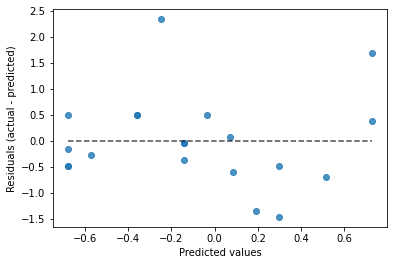

In [166]:
from sklearn.metrics import PredictionErrorDisplay

PredictionErrorDisplay.from_estimator(model, X_test, y_test)